/var/folders/83/p2hnf5yj2c38r1spynzx0nhr0000gn/T/ipykernel_11799/55672637.py:100: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = data.groupby(by=['teff', 'mh_xgboost']).size().reset_index(name='counts')


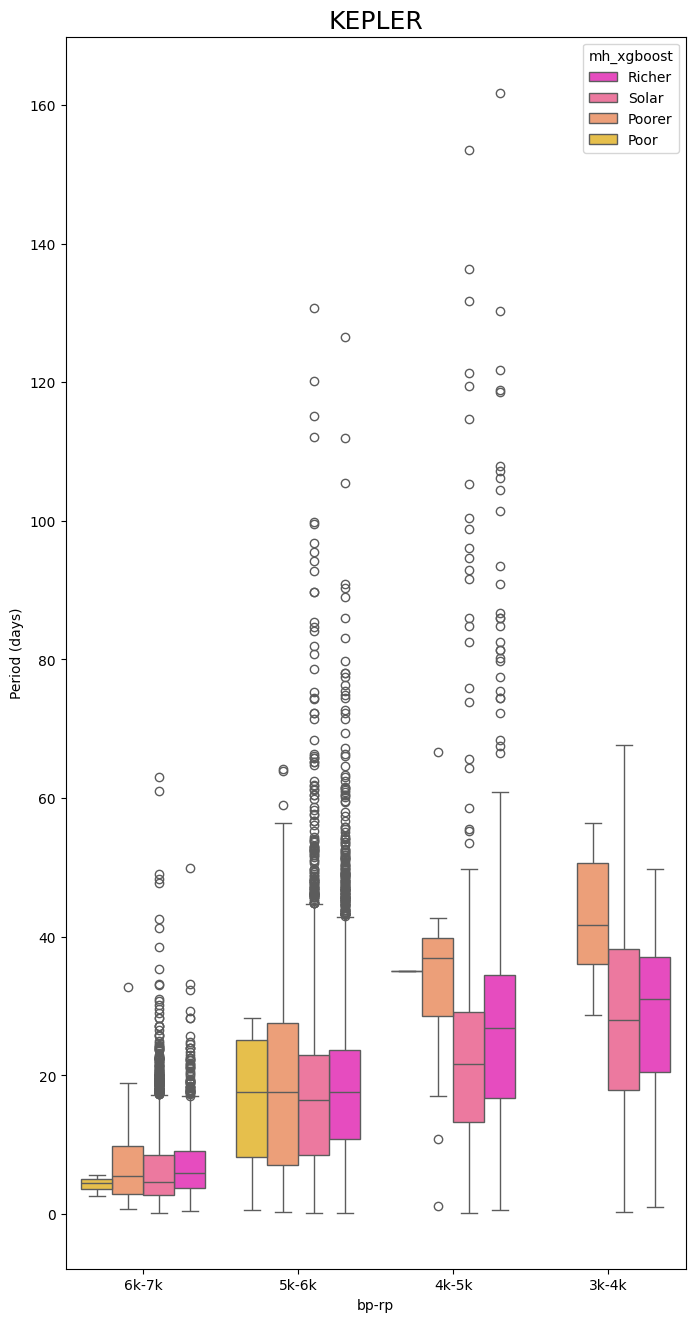

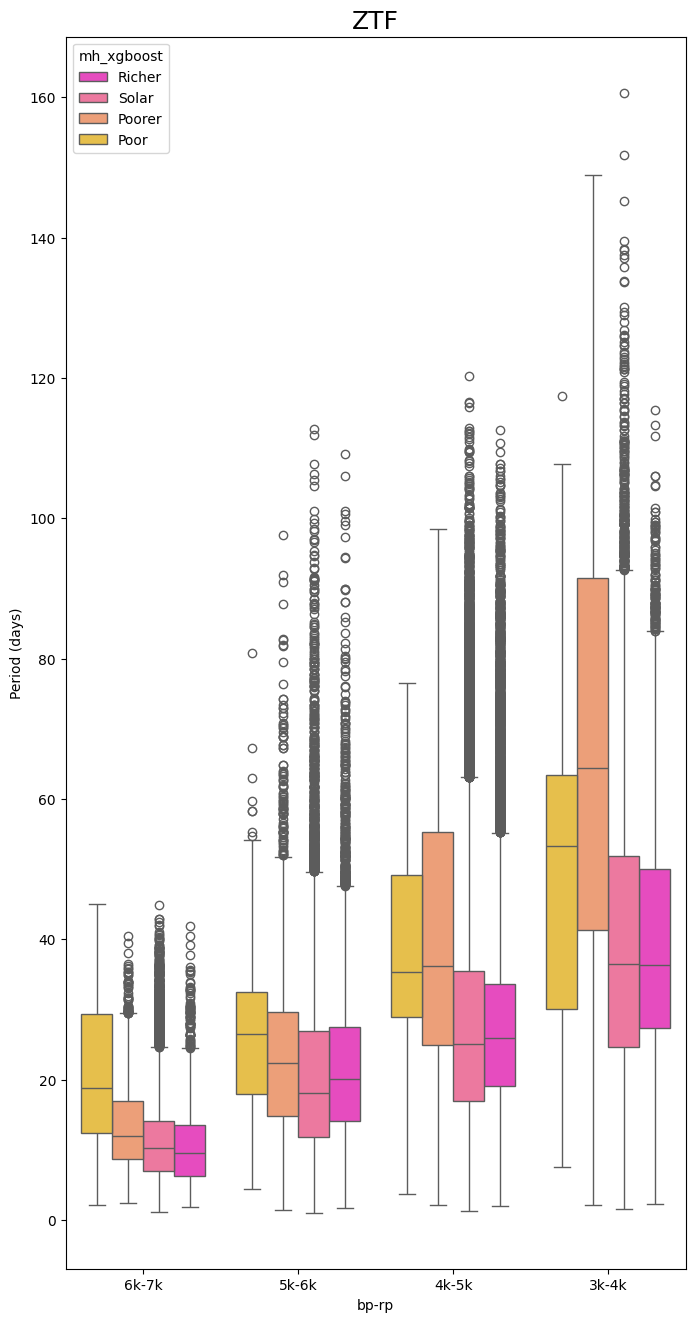

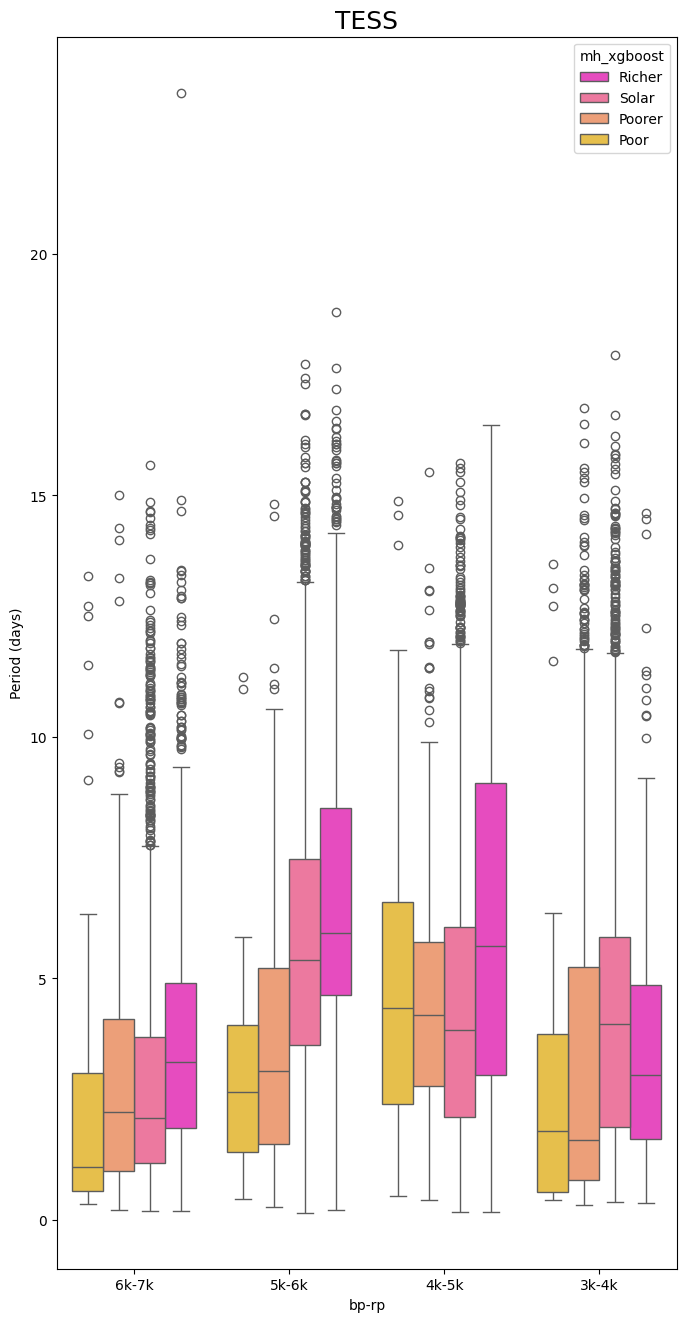

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def domainexpand():
    df = pd.read_csv('table-1.csv') # read in xgboost metallicity
    df2 = pd.read_csv('All_prot.csv') # read in full rotation period data
    df = df.loc[df['source_id'].isin(df2['source_id'])]

    df = pd.merge(df, df2, left_on='source_id', right_on='source_id', how='inner')
    df.to_csv('morerotations.csv')
    return df

def bprp_to_teff(bprp):
    """
    Calculate photometric Teff from Gaia color (use dereddened color!)
    Args:
        bprp (array): Gaia G_BP colour minus Gaia G_RP colour.
    Returns:
        teffs (array): Photometric effective temperatures.
    """

    coeffs = [8959.8112335205078, -4801.5566310882568, 1931.4756631851196,
            -2445.9980716705322, 2669.0248055458069, -1324.0671020746231,
            301.13205924630165, -25.923997443169355]
    """
    # Jason's updated parameters:
    coeffs = [-416.585, 39780.0, -84190.5, 85203.9, -48225.9, 15598.5,
              -2694.76, 192.865]
    """

    return np.polyval(coeffs[::-1], bprp)

# kepler data
def keplerplot():
    plt.figure(figsize=(8,16))
    ax = sns.boxplot(data=kepler, x='teff', y='Prot', orient='v', order=('3k-4k', '4k-5k', '5k-6k', '6k-7k'), 
                    hue='mh_xgboost', hue_order=('Richer', 'Solar', 'Poorer', 'Poor'), palette='spring', notch=False)

    # sets plot parameters
    ax.set_title('KEPLER', size=18)
    ax.set_ylabel('Period (days)')
    ax.set_xlabel('bp-rp')
    # ax.set_xticklabels(('Bluer', 'Solar', 'Redder'))
    ax.invert_xaxis()
    ax.tick_params(axis='x')

    plt.savefig('plots/largersample_kepler_temp.png')
    plt.show()

# ztf data
def ztfplot():
    plt.figure(figsize=(8,16))
    ax = sns.boxplot(data=ztf, x='teff', y='Prot', orient='v', order=('3k-4k', '4k-5k', '5k-6k', '6k-7k'), 
                    hue='mh_xgboost', hue_order=('Richer', 'Solar', 'Poorer', 'Poor'), palette='spring', notch=False)

    # sets plot parameters
    ax.set_title('ZTF', size=18)
    ax.set_ylabel('Period (days)')
    ax.set_xlabel('bp-rp')
    # ax.set_xticklabels(('Bluer', 'Solar', 'Redder'))
    ax.invert_xaxis()
    ax.tick_params(axis='x')

    plt.savefig('plots/largersample_ztf_temp.png')
    plt.show()

# tess data
def tessplot():
    plt.figure(figsize=(8,16))
    ax = sns.boxplot(data=tess, x='teff', y='Prot', orient='v', order=('3k-4k', '4k-5k', '5k-6k', '6k-7k'), 
                    hue='mh_xgboost', hue_order=('Richer', 'Solar', 'Poorer', 'Poor'), palette='spring', notch=False)

    # sets plot parameters
    ax.set_title('TESS', size=18)
    ax.set_ylabel('Period (days)')
    ax.set_xlabel('bp-rp')
    # ax.set_xticklabels(('Bluer', 'Solar', 'Redder'))
    ax.invert_xaxis()
    ax.tick_params(axis='x')

    plt.savefig('plots/largersample_tess_temp.png')
    plt.show()

data = pd.read_csv('morerotations.csv', sep=',')[['source_id', 'Prot', 'bp_rp', 'mh_xgboost', 'survey']].dropna()
teff = pd.Series(bprp_to_teff(data['bp_rp']), name='teff')

fehbins = pd.cut(data['mh_xgboost'], (-2, -1, -0.5, 0, 0.5),labels=('Poor', 'Poorer', 'Solar', 'Richer', ), include_lowest=True).dropna()
teffbins = pd.cut(teff, (3000, 4000, 5000, 6000, 7000), labels=('3k-4k', '4k-5k', '5k-6k', '6k-7k'), include_lowest=True).dropna()

data = data.drop(['bp_rp', 'mh_xgboost'], axis=1)
data = data.merge(teffbins, how='inner', left_index=True, right_index=True)
data = data.merge(fehbins, how='inner', left_index=True, right_index=True)

kepler = data.loc[data['survey'] == 'Kepler']
ztf = data.loc[data['survey'] == 'ZTF']
tess = data.loc[data['survey'] == 'TESS']

counts = data.groupby(by=['teff', 'mh_xgboost']).size().reset_index(name='counts')

keplerplot()
ztfplot()
tessplot()

# Testing Function Implementation

In [ ]:
import fix

fix.plotparams()

def bprpplot(csv, title, destination, palette):
    x = 'bp_rp'
    y = 'Prot'
    hue = 'mh_xgboost'
    xbin = (0.546, 0.719, 0.823, 1.10, 1.5, 1.8, 2.2, 2.5, 3.4)
    xbinlabel = ['1', '2', '3', '4', '5', '6', '7', '8']
    huebin =  (-2, -0.5, 0, 0.5, 2)
    huebinlabel = ['one', 'tow', 'thre', 'four']
    palette = palette

    df = fix.readcsv(csv, x, hue, xbin, xbinlabel, huebin, huebinlabel)
    ax = fix.boxplotdf(df, x, y, hue, xbinlabel.reverse(), huebinlabel.reverse(), palette)

    fix.plt.title(title, fontsize=18)
    fix.plt.savefig(destination)
    fix.plt.show()

def massplot(csv):
    x = 'Mass'
    y = 'Prot'
    hue = 'mh_xgboost'
    xbin = (0.85, 1, 1.15, 1.3)
    xbinlabel = ['0.85-1.0', '1.0-1.15', '1.15-1.3']
    huebin =  (-2, -0.1, 0.1, 2)
    huebinlabel = ['Poor', 'Solar', 'Rich']
    palette = 'crest'


    df = fix.readcsv(csv, x, hue, xbin, xbinlabel, huebin, huebinlabel)
    ax = fix.boxplotdf(df, x, y, hue, xbinlabel, reversed(huebinlabel), palette)

    ax.invert_xaxis()
    ax.set_xlabel('Msol')
    fix.plt.title('Prot vs. Mass binned by Metallicity', fontsize=18)
    fix.plt.savefig('plots/prot_vs_mass_results.png')
    fix.plt.show()

def teffplot(csv, title, destination, palette):
    bprp_to_teff

    x = 'teff'
    y = 'Prot'
    hue = 'mh_xgboost'
    xbin = (3000, 4000, 5000, 6000, 7000)
    xbinlabel = ['3k-4k', '4k-5k', '5k-6k', '6k-7k']
    huebin =  (-2, -0.1, 0.1, 2)
    huebinlabel = ['Poor', 'Solar', 'Rich']
    palette = palette

    df = fix.readcsv(csv, x, hue, xbin, xbinlabel, huebin, huebinlabel)
    ax = fix.boxplotdf(df, x, y, hue, xbinlabel, reversed(huebinlabel), palette)

    ax.invert_xaxis()
    ax.set_xlabel('Msol')
    fix.plt.title(title, fontsize=18)
    fix.plt.savefig(destination)
    fix.plt.show()


# Isolating Kepler Stars Not in Smaller Sample

In [3]:
# find unique value from larger survey
# df = fix.findunique('tempcsv/largersample_kepler.csv', '1747678826287O-result.csv', 
#                    'source_id', 'source_id', 'tempcsv/largersample_keplerunique.csv')

# adds xgboost metallicities from above file
# fix.writecsv('table-1.csv', 'tempcsv/largersample_keplerunique.csv', 
#             'source_id', 'source_id', 'tempcsv/largersample_keplerunique_xgboost.csv')

# creates plot with unique kepler data from larger sample
#bprpplot('tempcsv/largersample_keplerunique_xgboost.csv', 'Prot vs. bp-rp with Metallicities for Larger Sample', 'plots/prot_vs_bprp_keplerunique.png', palette='crest)

# Splitting Larger Rotation Period Sample by Survey (Kepler, ZTF, Tess)

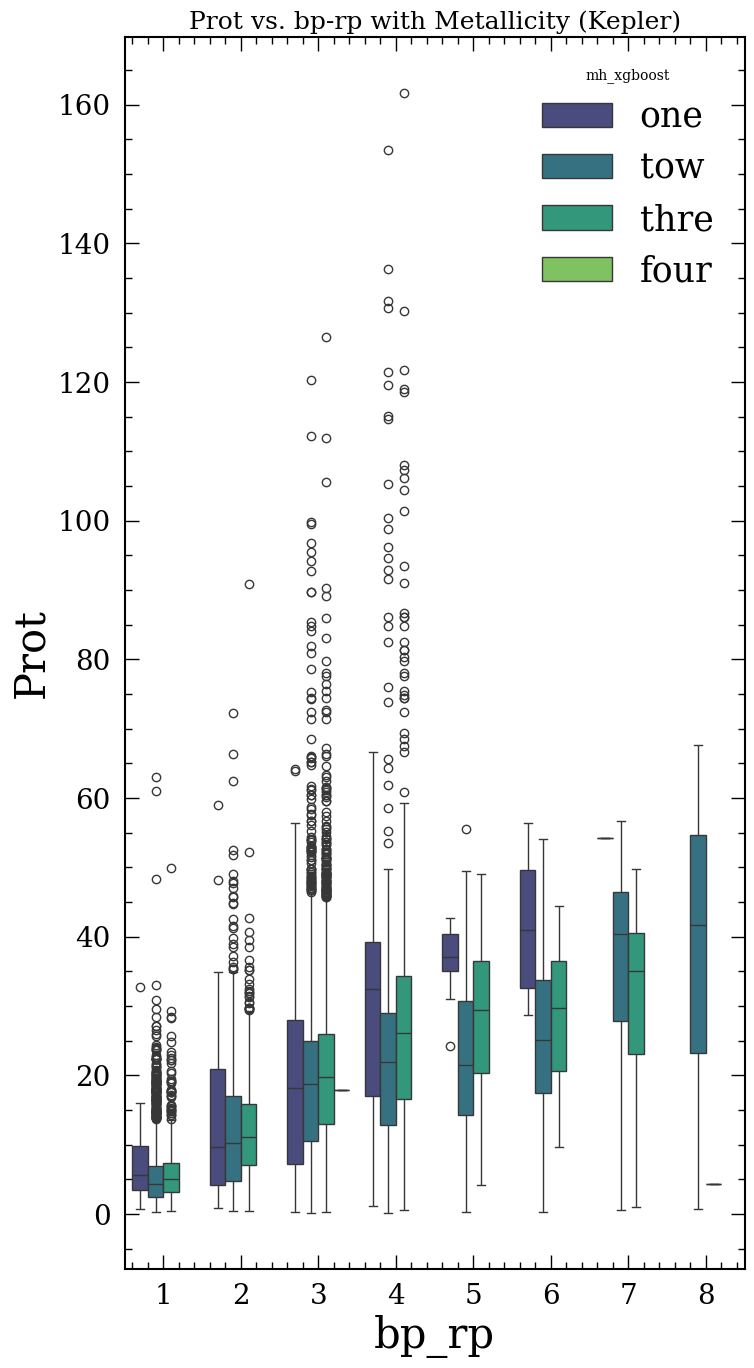

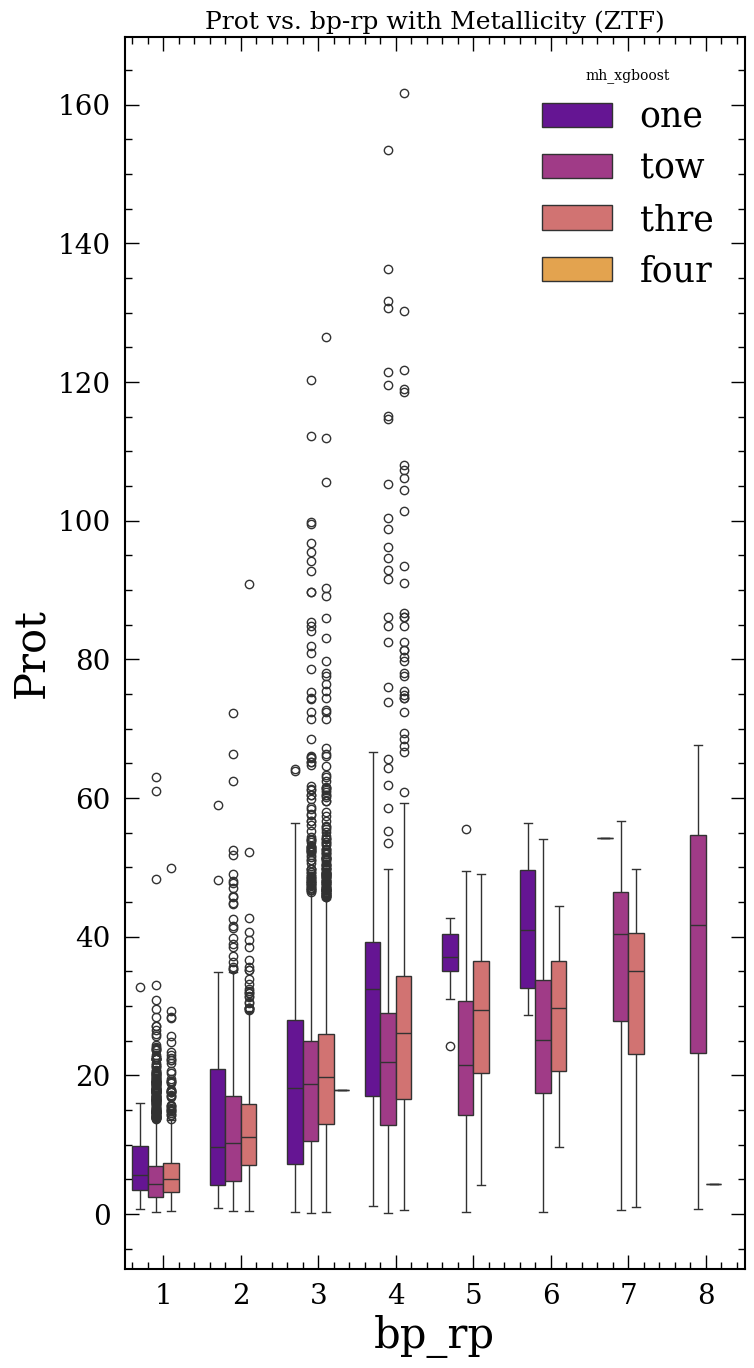

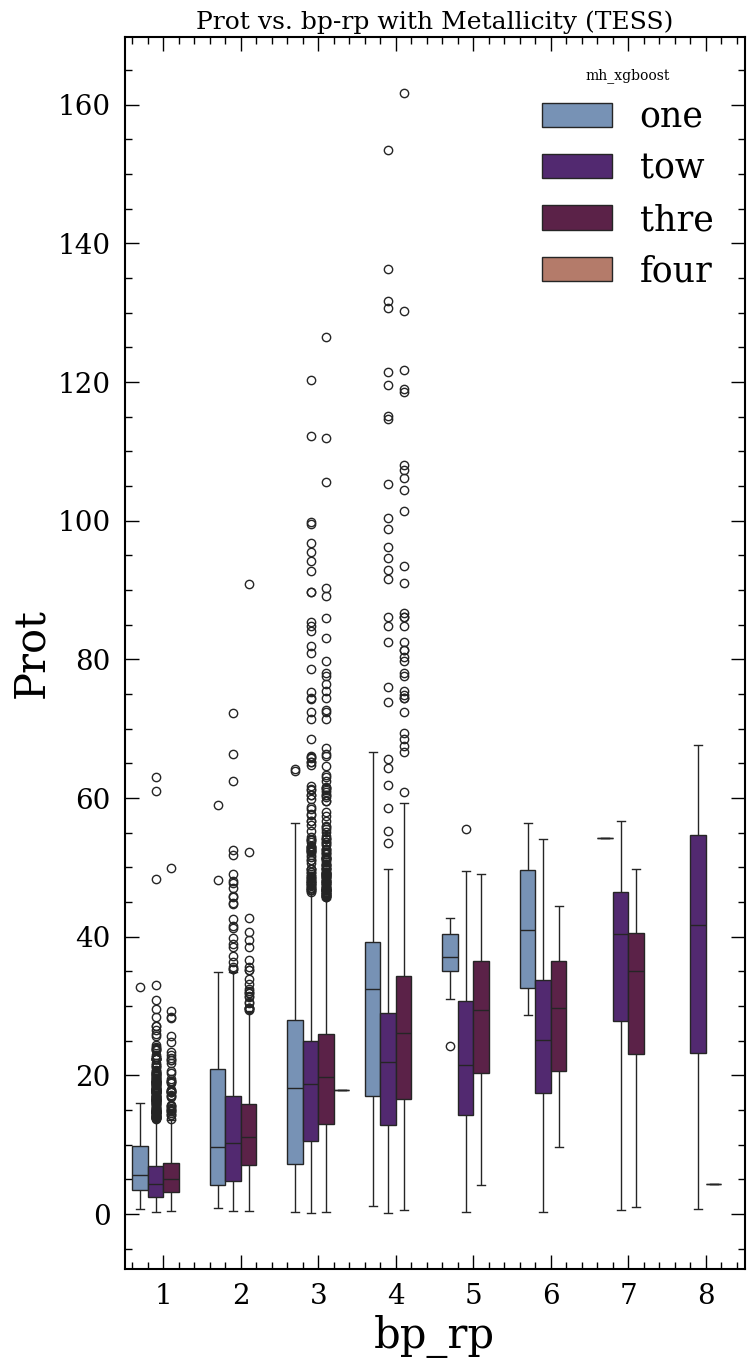

In [ ]:
# split larger sample by survey
def splitbysurvey():
    df = fix.pd.read_csv('tempcsv/prot_nokinematic_xgboost.csv')

    kepler = df.loc[df['survey'] == 'Kepler']
    kepler.to_csv('tempcsv/largersample_kepler_xgboost.csv')
    ztf = df.loc[df['survey'] == 'ZTF']
    kepler.to_csv('tempcsv/largersample_ztf_xgboost.csv')
    tess = df.loc[df['survey'] == 'TESS']
    kepler.to_csv('tempcsv/largersample_tess_xgboost.csv')


def individualsurveys():
    bprpplot('tempcsv/largersample_kepler_xgboost.csv', 'Prot vs. bp-rp with Metallicity (Kepler)', 'plots/largersample_kepler_bprp.png', 'viridis')
    bprpplot('tempcsv/largersample_ztf_xgboost.csv', 'Prot vs. bp-rp with Metallicity (ZTF)', 'plots/largersample_ztf_bprp.png', 'plasma')
    bprpplot('tempcsv/largersample_tess_xgboost.csv', 'Prot vs. bp-rp with Metallicity (TESS)', 'plots/largersample_tess_bprp.png', 'twilight')

def wholesurvey():
    bprpplot('tempcsv/prot_nokinematic_xgboost.csv', 'Prot vs. bp-rp with Metallicity (Entire Larger Rotation Sample)', 
             'plots/largersample_allsurveys_bprp.png', 'nipy_spectral')

    #teffplot('tempcsv/prot_nokinematic_xgboost.csv', 'Prot vs Teff with Metallicity (Entire Larger Rotation Sample)', 
    #         'plots/largersample_allsurveys_teff.png', 'turbo')
    
splitbysurvey()
individualsurveys()
